In [205]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [206]:
train_data_generator = image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_img = train_data_generator.flow_from_directory(
    './training_set/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_data_generator = image.ImageDataGenerator(
    rescale=1./255
)

test_img = test_data_generator.flow_from_directory(
    './test_set/test_set/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [207]:
def cnn_model(optimizer, epochs):
    
    model = Sequential()

    model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'))
    model.add(Flatten())

    model.add(Dense(units=256, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.fit(train_img, validation_data=test_img, epochs=epochs)

    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])
    
    return model

Epoch 1/24
251/251 [==============================] - 112s 439ms/step - loss: 0.6908 - accuracy: 0.5280 - val_loss: 0.6825 - val_accuracy: 0.5517
Epoch 2/24
251/251 [==============================] - 105s 418ms/step - loss: 0.6793 - accuracy: 0.5655 - val_loss: 0.6712 - val_accuracy: 0.5833
Epoch 3/24
251/251 [==============================] - 104s 415ms/step - loss: 0.6655 - accuracy: 0.5936 - val_loss: 0.6517 - val_accuracy: 0.6258
Epoch 4/24
251/251 [==============================] - 107s 428ms/step - loss: 0.6336 - accuracy: 0.6408 - val_loss: 0.6422 - val_accuracy: 0.6377
Epoch 5/24
251/251 [==============================] - 110s 438ms/step - loss: 0.6083 - accuracy: 0.6680 - val_loss: 0.5965 - val_accuracy: 0.6945
Epoch 6/24
251/251 [==============================] - 141s 562ms/step - loss: 0.5763 - accuracy: 0.6958 - val_loss: 0.5718 - val_accuracy: 0.7108
Epoch 7/24
251/251 [==============================] - 148s 590ms/step - loss: 0.5523 - accuracy: 0.7124 - val_loss: 0.5506 -

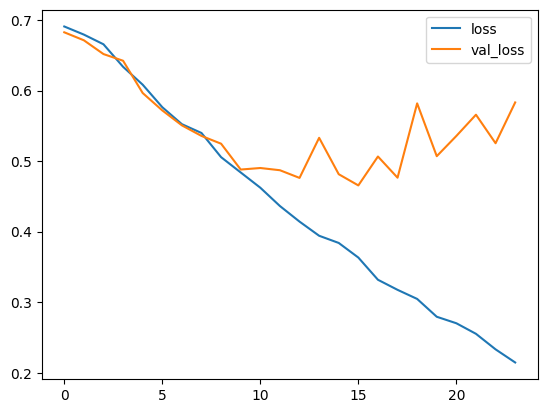

In [208]:
model_adam = cnn_model(optimizer='adam', epochs=24)

In [209]:
cat_path = './test_images/cats/'
dog_path = './test_images/dogs/'

print(train_img.class_indices)

{'cats': 0, 'dogs': 1}


In [210]:
for cat in os.listdir(cat_path):

    test_cat = image.load_img(cat_path + cat, target_size=(64, 64))
    test_cat = image.img_to_array(test_cat)
    test_cat = np.expand_dims(test_cat, axis=0)
    prediction = model_adam.predict(test_cat)
    
    print('prediction', prediction)

    if prediction[0][0] < 0.5:
        print('correct')
    else:
        print('wrong')

1/1 [==============================] - 0s 194ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 41ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 43ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 46ms/step
prediction [[0.]]
correct
1/1 [==============================] - 0s 40ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 40ms/step
prediction [[0.]]
correct


In [211]:
for dog in os.listdir(dog_path):

    test_dog = image.load_img(dog_path + dog, target_size=(64, 64))
    test_dog = image.img_to_array(test_dog)
    test_dog = np.expand_dims(test_dog, axis=0)
    prediction = model_adam.predict(test_dog)
    
    print('prediction', prediction)

    if prediction[0][0] >= 0.5 :
        print('correct')
    else:
        print('wrong')

1/1 [==============================] - 0s 40ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 37ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 45ms/step
prediction [[8.345999e-06]]
wrong
1/1 [==============================] - 0s 38ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 38ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 40ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 39ms/step
prediction [[1.]]
correct


Epoch 1/21
251/251 [==============================] - 124s 489ms/step - loss: 0.6982 - accuracy: 0.5318 - val_loss: 0.6968 - val_accuracy: 0.5205
Epoch 2/21
251/251 [==============================] - 134s 532ms/step - loss: 0.6546 - accuracy: 0.6226 - val_loss: 0.6024 - val_accuracy: 0.6742
Epoch 3/21
251/251 [==============================] - 151s 602ms/step - loss: 0.6070 - accuracy: 0.6682 - val_loss: 0.5674 - val_accuracy: 0.7084
Epoch 4/21
251/251 [==============================] - 124s 492ms/step - loss: 0.5751 - accuracy: 0.6961 - val_loss: 0.5441 - val_accuracy: 0.7365
Epoch 5/21
251/251 [==============================] - 116s 460ms/step - loss: 0.5437 - accuracy: 0.7239 - val_loss: 0.6228 - val_accuracy: 0.6466
Epoch 6/21
251/251 [==============================] - 121s 479ms/step - loss: 0.5175 - accuracy: 0.7419 - val_loss: 0.5625 - val_accuracy: 0.7044
Epoch 7/21
251/251 [==============================] - 113s 450ms/step - loss: 0.4913 - accuracy: 0.7605 - val_loss: 0.4727 -

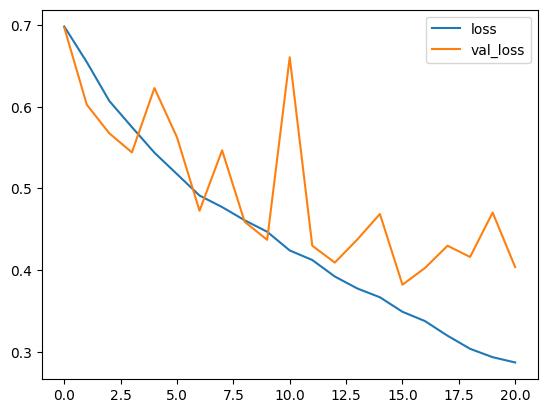

In [213]:
model_rms = cnn_model(optimizer='rmsprop', epochs=21)

In [214]:
cat_path = './test_images/cats/'
dog_path = './test_images/dogs/'

print(train_img.class_indices)

{'cats': 0, 'dogs': 1}


In [215]:
for cat in os.listdir(cat_path):

    test_cat = image.load_img(cat_path + cat, target_size=(64, 64))
    test_cat = image.img_to_array(test_cat)
    test_cat = np.expand_dims(test_cat, axis=0)
    prediction = model_rms.predict(test_cat)
    
    print('prediction', prediction)

    if prediction[0][0] < 0.5:
        print('correct')
    else:
        print('wrong')

1/1 [==============================] - 0s 205ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 40ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 48ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 48ms/step
prediction [[0.]]
correct
1/1 [==============================] - 0s 40ms/step
prediction [[1.]]
wrong
1/1 [==============================] - 0s 42ms/step
prediction [[0.]]
correct


In [216]:
for dog in os.listdir(dog_path):

    test_dog = image.load_img(dog_path + dog, target_size=(64, 64))
    test_dog = image.img_to_array(test_dog)
    test_dog = np.expand_dims(test_dog, axis=0)
    prediction = model_rms.predict(test_dog)
    
    print('prediction', prediction)

    if prediction[0][0] > 0.5 :
        print('correct')
    else:
        print('wrong')

1/1 [==============================] - 0s 39ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 38ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 40ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 43ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 42ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 41ms/step
prediction [[1.]]
correct
1/1 [==============================] - 0s 42ms/step
prediction [[1.]]
correct
